# Probelm Set 6
By: Bethany Bailey
## Differentiation
### Problem 1

In [358]:
import math
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
import scipy.linalg as la
from scipy import sparse
from scipy import optimize as opt
from scipy.linalg import norm
from sympy.matrices import *
from sympy import lambdify
from sympy import *

In [3]:
def sympy_diff():
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    d = sy.diff(f, x)
    lam_d = sy.utilities.lambdify(x, d)
    lam_f = sy.utilities.lambdify(x, f)
    
    return lam_f, lam_d

In [4]:
f, df = sympy_diff()

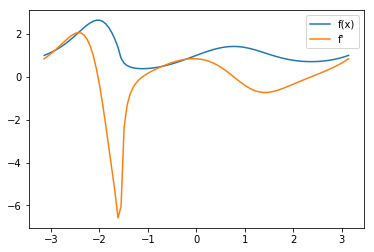

In [5]:
ax = plt.gca()
dom = np.linspace(-np.pi, np.pi, 100)
ax.plot(dom, f(dom), label="f(x)")
ax.plot(dom, df(dom), label="f'")
plt.legend()
plt.show()

### Problem 2

In [6]:
def forward_o1(f, x, h): 
    num = f(x+h) - f(x)
    return num / h

def forward_o2(f, x, h):
    num = -3 * f(x) + 4 * f(x + h) - f(x + 2 * h)
    return num / (2 * h)

def backward_o1(f, x, h):
    num = f(x) - f(x-h) 
    return num / h

def backward_o2(f, x, h):
    num = 3 * f(x) - 4 * f(x - h) + f(x - 2 * h)
    return num / (2 * h)

def centered_o2(f, x, h):
    num = f(x + h) - f(x - h)
    return num / (2 * h)

def centered_o4(f, x, h):
    num = f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)
    return num / (12 * h)

In [7]:
def approx_der(x):
    return (np.sin(x) + 1) ** (np.sin(np.cos(x)))

In [8]:
def plot_finite(ax, f, symdf, df, dom, h, label):
    ax.spines["bottom"].set_position("zero")
    domain = np.linspace(-np.pi, np.pi, 100)
    ax.plot(dom, f(dom), label="f(x)")
    ax.plot(dom, symdf(dom), label="f'")
    ax.plot(dom, df(approx_der, dom, h), label=label)
    ax.legend()

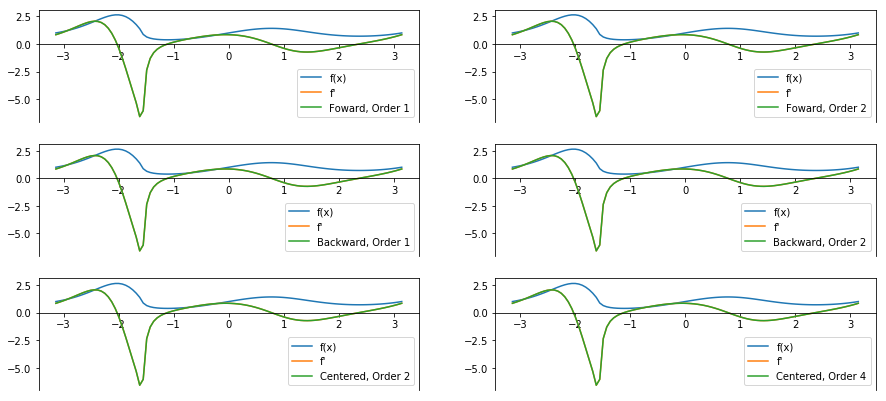

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(15,7))
h = 1e-5

plot_finite(ax[0,0], f, df, forward_o1, dom, h, 'Foward, Order 1')  
plot_finite(ax[0,1], f, df, forward_o2, dom, h, 'Foward, Order 2')   
plot_finite(ax[1,0], f, df, backward_o1, dom, h, 'Backward, Order 1')   
plot_finite(ax[1,1], f, df, backward_o2, dom, h, 'Backward, Order 2')   
plot_finite(ax[2,0], f, df, centered_o2, dom, h, 'Centered, Order 2')   
plot_finite(ax[2,1], f, df, centered_o4, dom, h, 'Centered, Order 4')   
plt.show()

### Problem 3

In [22]:
def abs_error(x_0):
    
    h = np.logspace(-8,0,10)
    
    f, df = sympy_diff()
    df_x0 = df(x_0)
    
    fo1 = np.zeros(len(h), dtype=np.float64)
    fo2 = np.zeros(len(h), dtype=np.float64)
    bo1 = np.zeros(len(h), dtype=np.float64)
    bo2 = np.zeros(len(h), dtype=np.float64)
    co2 = np.zeros(len(h), dtype=np.float64)
    co4 = np.zeros(len(h), dtype=np.float64)
    
    for index, hlevel in enumerate(h):
        fo1[index] = np.abs(df(x_0) - forward_o1(approx_der, x_0, hlevel))
        fo2[index] = np.abs(df(x_0) - forward_o2(approx_der, x_0, hlevel))
        bo1[index] = np.abs(df(x_0) - backward_o1(approx_der, x_0, hlevel))
        bo2[index] = np.abs(df(x_0) - backward_o2(approx_der, x_0, hlevel))
        co2[index] = np.abs(df(x_0) - centered_o2(approx_der, x_0, hlevel))
        co4[index] = np.abs(df(x_0) - centered_o4(approx_der, x_0, hlevel))
    
    plt.plot(h, fo1, '-o', label='Order 1 Forward')
    plt.plot(h, fo2, '-o', label='Order 2 Forward')
    plt.plot(h, bo1, '-o', label='Order 1 Backward')
    plt.plot(h, bo2, '-o', label='Order 2 Backward')
    plt.plot(h, co2, '-o', label='Order 2 Centered')
    plt.plot(h, co4, '-o', label='Order 4 Centered')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('h')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error Comparison')
    plt.legend()
    plt.show()

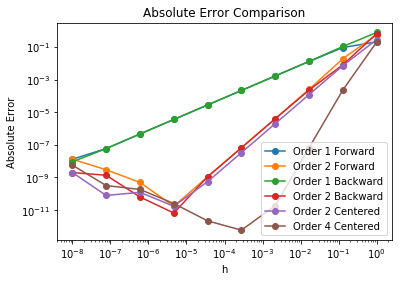

In [23]:
abs_error(1)

### Problem 4

In [25]:
# Load in data
plane_data = np.load('plane.npy')

In [27]:
# Convert α and β to radians
alpha_rad = np.radians(plane_data[:,1])
beta_rad = np.radians(plane_data[:,2])

In [29]:
# Compute the coordinates x(t) and y(t) at each given t
x_coor = 500 * np.tan(beta_rad) / (np.tan(beta_rad) - np.tan(alpha_rad))
y_coor = 500 * np.tan(beta_rad) * np.tan(alpha_rad) / (np.tan(beta_rad)- np.tan(alpha_rad))

In [32]:
# Approximate x'(t) and y'(t)
t = np.arange(8, 14)

x_prime = np.empty(8, dtype=np.float64)
y_prime = np.empty(8, dtype=np.float64)

for i in range(8):
    if i == 0:
        x_prime[i] = x_coor[i+1] - x_coor[i]
        y_prime[i] = y_coor[i+1] - y_coor[i]
    elif i == 7:
        x_prime[i] = x_coor[i] - x_coor[i-1] 
        y_prime[i] = y_coor[i] - y_coor[i-1] 
    else:
        x_prime[i] = .5 * (x_coor[i+1] - x_coor[i-1])
        y_prime[i] = .5 * (y_coor[i+1] - y_coor[i-1])

In [34]:
# Return the values of the speed 􏰇x′(t)2 + y′(t)2 at each t
speed = np.sqrt(x_prime ** 2 + y_prime ** 2)
speed

array([ 46.42420062,  47.00103938,  48.99880514,  50.09944163,
        48.29035084,  51.56455905,  53.92303355,  51.51480057])

### Problem 5

In [75]:
def approx_jacobian(f, x_0, h):
    m = np.size(f(x_0))
    n = np.size(x_0)
    I = np.eye(n)
    J = (f(x_0 + h * I) - f(x_0 - h * I)) / (2 * h)
    
    return J

def f(x_0):
    f = np.array([ [x_0[0] ** 2], [x_0[0] ** 3 - x_0[1] ] ])

    return f

approx_jacobian(f, [1, 2], 1e-4)

array([[[ 2.        ,  0.        ]],

       [[ 3.00000001, -1.        ]]])

In [76]:
x, y = sy.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y
F = sy.Matrix([f1,f2])  
F.jacobian([x,y])
F.jacobian([x,y]).subs([(x,0), (y,0)])

Matrix([
[0,  0],
[0, -1]])

In [77]:
# Not sure why the result doesn't match.

### Problem 6

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


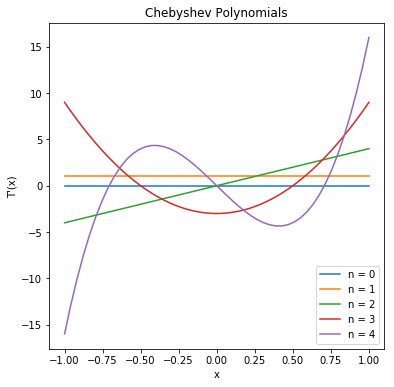

In [81]:
from autograd import numpy as grid_np
from autograd import grad
from autograd import elementwise_grad

def T(x, n):
    
    if n == 0:
        return grid_np.ones_like(x)
    elif n == 1:
        return x
        
    return 2 * x * T(x, n - 1) - T(x, n - 2)

dT = elementwise_grad(T)
x_grid = grid_np.linspace(-1, 1)
plt.figure(figsize=(6, 6))
for n in range(5):
    plt.plot(x_grid, dT(x_grid, n), label=f'n = {n}')
plt.legend()
plt.xlabel("x")
plt.ylabel("T'(x)")
plt.title('Chebyshev Polynomials')
plt.show()

### Problem 7

In [395]:
import time
from autograd import grad

def problem7(N):
    
    func = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
    time_sym = np.zeros(N, dtype=np.float64)
    time_autograd = np.zeros(N, dtype=np.float64)
    time_centered = np.zeros(N, dtype=np.float64)
    err_centered = np.zeros(N, dtype=np.float64)
    err_autograd = np.zeros(N, dtype=np.float64)

    for ii in range(N):
        x0 = np.random.rand()
        time_start_exact = time.time()
        f, df = sympy_diff()
        time_sym[ii] =  time.time() - time_start_exact
        time_start_centered = time.time()
        err_centered[ii] = np.abs(centered_o4(func, x0, 1e-4) - df(x0))
        time_centered[ii] =  time.time() - time_start_centered
        dfgrad = grad(func)
        time_start_autograd = time.time()
        err_autograd[ii] = np.abs(dfgrad(x0) - df(x0))
        time_autograd[ii] = time.time() - time_start_autograd
            
    fig = plt.figure(figsize=(10, 7))
    plt.scatter(time_sym, 1e-18 * np.ones(N), alpha=0.5, label='Exact, SymPy', s=30)
    plt.scatter(time_centered, err_centered, alpha=0.5, label='Centered Difference', s=30)
    plt.scatter(time_autograd, err_autograd, alpha=0.5, label='Autograd', s=30)
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-12)
    plt.xlabel('Seconds')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

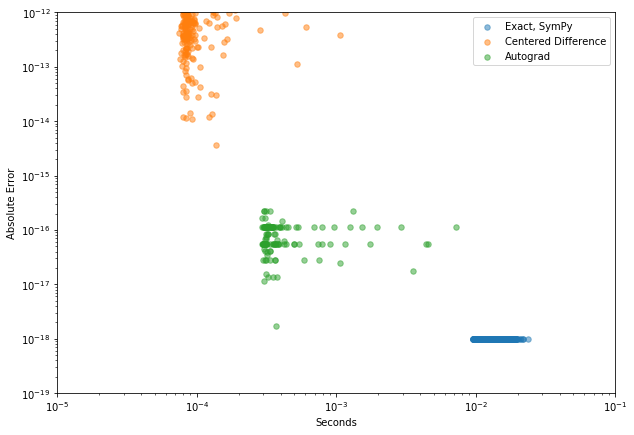

In [396]:
problem7(200)

## Numerical Integration

### Problem 14.1

In [82]:
def newton_cotes(g, a, b, N, method):
    if method == "midpoint":
        midpoints = np.zeros(N)
        mid_results = 0
        for i in range(N):
            midpoints[i] = a + (2 * i + 1) * (b - a) / (2 * N)
            mid_results += g(midpoints[i])    
        result = (b - a) / N * mid_results
        
    elif method == "trapezoid":
        endpoints = np.zeros(N + 1)
        for i in range(N + 1):
            endpoints[i] = a + (b - a) * i / N
        trap_res = 0
        for i in range(1, N):
            trap_res += g(endpoints[i])
        result = (b - a) / (2 * N) * (g(a) + 2 * trap_res + g(b))
        
    elif method == "Simpsons":
        samplepoints = np.zeros(2 * N + 1)
        for i in range(2 * N + 1):
            samplepoints[i] = a + i *(b - a) / (2 * N) 
        simp_res = 0
        for i in range(1, 2 * N):
            if i % 2 == 1:
                simp_res += 4 * g(samplepoints[i])
            else:
                simp_res += 2 * g(samplepoints[i])
        result = (b - a) / 3 / (2 * N) * (g(a) + simp_res + g(b))
        
    else:
        raise ValueError("Method must be midpoint, trapezoid, or Simpsons")
        
    return result

In [83]:
g = lambda x : 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x +1

In [84]:
midpoint = newton_cotes(g, -10, 10, 10000, 'midpoint')
midpoint

4373.3331964666322

In [85]:
trapezoid = newton_cotes(g, -10, 10, 10000, 'trapezoid')
trapezoid

4373.3336070666837

In [86]:
Simpsons = newton_cotes(g, -10, 10, 10000, 'Simpsons')
Simpsons

4373.3333333333694

The analytical solution is 4,373.33, so these are all very close.

## Simplex Method
### Problems 1 - 6

In [201]:
class SimplexSolver():
    
    def __init__(self, c, A, b):
        # Check feasiblity of origin
        if (b >= 0).all():
            self.c = c
            self.A = A
            self.b = b
            self.m, self.n = A.shape
            self.L = np.concatenate([np.arange(self.n, self.m + self.n, 1),   
                                 np.arange(0, self.n, 1)])  
            self.T = self.create_tableau()
        else:
            raise ValueError("Origin is not feasible")
            
    def create_tableau(self):
        c_bar = np.concatenate([self.c, np.zeros(self.m)])
        c_bar = -1 * c_bar
        T1 = np.concatenate([np.array([0]), c_bar, np.array([1])])
        A_bar = np.concatenate([self.A, np.eye(self.m)], axis = 1)
        T2 = np.hstack([self.b.reshape(len(self.b), 1), A_bar, np.zeros((self.m, 1))])
        T = np.vstack([T1, T2])
        
        return T
    
    def pivot_Bland(self):
        T = self.T.copy()
        column = np.argmax(T[0,1:] < 0) + 1
        
        if any(T[:, column] > 0)== False:
            raise ValueError('Cannot pivot because the problem is unbounded.')
           
        negative = T[:, column] <= 0
        T[negative, column] = np.nan
        row_ind = np.nanargmin(T[:, 0] / T[:, column])
        
        return row_ind, column
        
    def do_pivot(self):
        L, T, m = self.L, self.T, self.m
        row_ind, column = self.pivot_Bland()
        L[row_ind - 1], L[column + m - 1] = L[column + m - 1], L[row_ind - 1]
        if T[row_ind, column] != 0:
             T[row_ind, :] = T[row_ind, :] / float(T[row_ind, column])
        for i in range(T.shape[0]):
            if i == row_ind:
                pass
            else:
                factor = -T[i, column]
                T[i, :] += factor * T[row_ind, :]
        self.T = T
        self.L = L
        
    def solve(self):
        tol = -1e-8
        while np.any(self.T[0, :] < 0):
            self.do_pivot()
        value = np.ndarray.tolist(self.T[1:,0])
        n = len(value)
        D1 = dict(zip(self.L[:n], [float(str(round(i, 2))) for i in value]))
        D2 = dict(zip((self.L[n:]), np.zeros(len(self.L) - n)))
        
        return float(self.T[0,0]), D1, D2

In [202]:
# Set parameters to test
c = np.array([3, 2])
b = np.array([2, 5, 7])
A = np.array([[1, -1], [3, 1], [4, 3]])

In [203]:
solver = SimplexSolver(c, A, b)
sol = solver.solve()
print(sol)

(5.2, {2: 0.6, 0: 1.6, 1: 0.2}, {3: 0.0, 4: 0.0})


### Problem 7

In [204]:
data = np.load('productMix.npz')

In [205]:
p = data['p']
A = np.vstack([data['A'], np.eye(4)])
b = np.hstack([data['m'], data['d']])

In [206]:
program = SimplexSolver(p, A, b)
program.solve()

(7453.596491228071,
 {0: 10.0, 1: 6.19, 2: 12.0, 3: 1.79, 6: 0.97, 8: 13.81, 10: 8.21},
 {4: 0.0, 5: 0.0, 7: 0.0, 9: 0.0})

## Iterative Solvers
### Problem 1 - 2

In [257]:
def Jacobi(A, b, tol, maxiters, plot = False):
    m, n = A.shape
    cur_iter = 1
    diff = tol + 1
    L = np.tril(A)
    U = np.triu(A)
    D = np.diag(A)
    x0 = b / D
    error = []
    
    while (cur_iter < maxiters) and (diff > tol):
        x1 = x0 + (b - A @ x0) / D
        diff = la.norm(x1 - x0, ord = np.inf)
        error.append(diff)
        x0 = x1
        cur_iter += 1
        
    if plot:
        fig = plt.figure(figsize=(6, 6))
        plt.semilogy(error)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Absolute Approximation Error")
        plt.title("Jacobi Method")
        plt.show()
        
    return x0

In [258]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [259]:
A = diag_dom(5)
b = np.ones(5)
ans = Jacobi(A, b, 1e-8, 1000)
np.allclose(A @ ans, b)

True

In [260]:
la.solve(A, b)

array([ 1.        ,  0.28571429,  0.42857143,  1.        ,  1.        ])

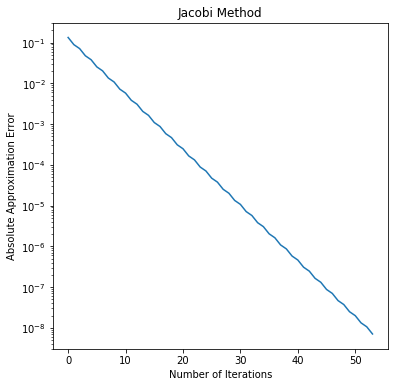

array([ 1.        ,  0.28571428,  0.42857142,  1.        ,  1.        ])

In [261]:
Jacobi(A, b, 1e-8, 1000, True)

### Problem 3

In [266]:
def Gauss_Seidel(A, b, tol, maxiters, plot = False):
    error = []
    diff = tol + 1
    cur_iter = 1
    n = len(b)
    xk = np.zeros(n)
    
    while (cur_iter < maxiters) and (diff > tol):
        xkp1 = np.copy(xk)
        for i in range(n):
            xkp1[i] = xk[i] + (1 / A[i, i]) * (b[i] - A[i, :].T @ xk)
        abs_err = np.linalg.norm(A @ xkp1 - b, np.inf)
        error.append(abs_err)
        diff = np.linalg.norm(xkp1 - xk, np.inf)
        cur_iter += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(6, 6))
        plt.semilogy(error)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Absolute Approximation Error")
        plt.title("Gauss-Seidel Method")
        plt.show()
    
    return xk

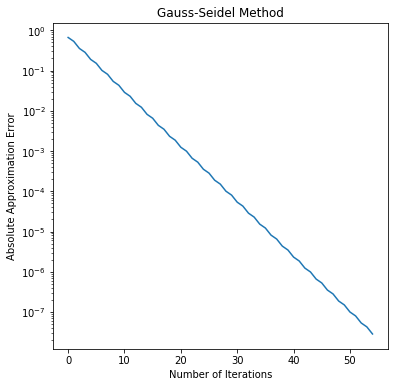

True

In [268]:
res2 = Gauss_Seidel(A, b, 1e-8, 1000, True)        
np.allclose(A @ res2, b)

### Problem 4

In [269]:
def Gauss_Seidel_Sparse(A, b, tol, maxiters, plot = False):
    error = []
    diff = tol + 1
    cur_iter = 1
    n = len(b)
    xk = np.zeros(n)
    A = A.tocsr()
    
    while (cur_iter < maxiters) and (diff > tol):
        xkp1 = np.copy(xk)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            xkp1[i] = xk[i] + (1 / A[i, i]) * (b[i] - 1 * Aix)
        abs_err = np.linalg.norm(A @ xkp1 - b, np.inf)
        error.append(abs_err)
        diff = np.linalg.norm(xkp1 - xk, np.inf)
        cur_iter += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(6, 6))
        plt.semilogy(error)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Absolute Approximation Error")
        plt.title("Gauss-Seidel Method (Sparse)")
        plt.show()
    
    return xk

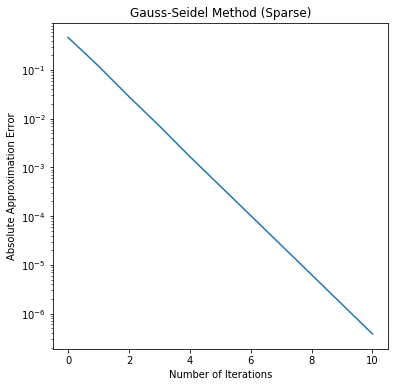

False

In [276]:
A_sparse = sparse.csr_matrix(diag_dom(5000))
b_sparse = np.random.random(5000)
res3 = Gauss_Seidel_Sparse(A_sparse, b_sparse, 1e-8, 1000, True)        
np.allclose(A_sparse @ res3, b_sparse)

### Problem 5

In [288]:
def SOR(A, b, w, tol, maxiters, plot = False):
    error = []
    diff = tol + 1
    cur_iter = 1
    n = len(b)
    xk = np.zeros(n)
    A = A.tocsr()
    
    while (cur_iter < maxiters) and (diff > tol):
        xkp1 = np.copy(xk)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            xkp1[i] = xk[i] + (w / A[i, i]) * (b[i] - 1 * Aix)
        abs_err = np.linalg.norm(A @ xkp1 - b, np.inf)
        error.append(abs_err)
        diff = np.linalg.norm(xkp1 - xk, np.inf)
        cur_iter += 1
        xk = xkp1
    
    if plot:
        fig = plt.figure(figsize=(6, 6))
        plt.semilogy(error)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Absolute Approximation Error")
        plt.title("Gauss-Seidel Method (Sparse)")
        plt.show()
    
    return xk, cur_iter

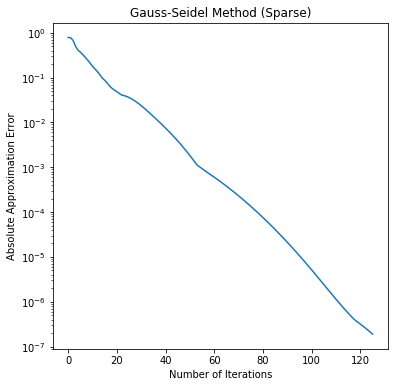

In [290]:
w = 1.5
x_j, it = SOR(A_sparse, b_sparse, w, 1e-8, 1000, True)

## Newton's Method
### Problem 1

In [324]:
def newton(f, x_0, fprime, tol=1e-5, maxiters=15):
    x_k = x_0
    converged = False 
    
    for i in range(maxiters):
        x_kp1 = x_k - f(x_k) / fprime(x_k)
        diff = np.abs(x_kp1 - x_k)
        if diff < tol:
            converged = True
            break
        x_k = x_kp1
        
    return x_kp1

In [305]:
f = lambda x: x ** 4 - 3.
fprime = lambda x: 4 * x ** 3

fprime(2.)

32.0

In [307]:
newton(f, 1, fprime)

1.3160740129543826

In [308]:
f(newton(f, 1, fprime))

1.723465814507108e-11

In [309]:
opt.newton(f,1,fprime)

1.3160740129524924

### Problem 2

In [315]:
def find_r(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** - N2)
    fprime = lambda r: P1 * N1 * (1 + r) ** (N1 - 1) + P2 * N2 * (1 + r) ** (-N2 - 1)
    root = newton(f, 0.1, fprime)
    
    return root

In [316]:
find_r(30, 20, 2000, 8000)

0.038786670117328476

### Problem 3

In [325]:
def newton2(f, x_0, fprime, alpha=1, tol=1e-5, maxiters=15):
    x_k = x_0
    converged = False 
    
    for i in range(maxiters):
        x_kp1 = x_k - alpha * (f(x_k) / fprime(x_k))
        diff = np.abs(x_kp1 - x_k)
        if diff < tol:
            converged = True
            break
        x_k = x_kp1
        
    return x_kp1, i

In [326]:
g = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
gprime = lambda x: (1./3)*np.power(np.abs(x), -2./3)

gprime(2)

0.20998684164914552

In [327]:
newton2(g, 0.1, gprime)

(-3276.7999999999897, 14)

In [328]:
newton2(g, 0.1, gprime, .4)

(-1.2800000000000233e-06, 6)

### Problem 4

In [334]:
def newton_iters(f, x_0, fprime, tol=1e-5, maxiters=15):
    
    alpha = np.linspace(.01, 1, 1000)
    converged = False 
    numIts = np.empty(len(alpha))
    
    for j in range(len(alpha)):
        alpha_iter = alpha[j]
        numIts[j] = newton2(f, x_0, fprime, alpha_iter, tol, maxiters)[1]

    plt.plot(alpha, numIts)
    plt.xlabel("alpha")
    plt.ylabel("# of Iterations")
    plt.title('Convergence of Newton Method')
    plt.show()
    
    alpha_min = alpha[np.argwhere(numIts == np.min(numIts))][0][0]
    return alpha_min

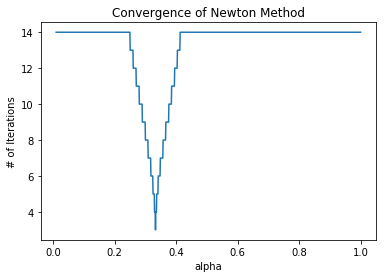

0.3330630630630631

In [335]:
newton_iters(g, 1000, gprime)

### Problem 5

In [351]:
def newton_n(f, fprime, xinit, alpha, tol=1e-5, maxiter=15):
    x = xinit
    diff = tol + 1
    
    if np.isscalar(x):
        return newton2(f, x, fprime, alpha=1, tol=1e-5, maxiters=15)
    else:
        current_iter = 0
        while diff > tol and current_iter < maxiter:
            y = np.linalg.solve(fprime(x), f(x))
            x_new = x - alpha * y
            diff = norm(x_new - x, np.inf)
            x = x_new
            current_iter += 1
        return x

In [352]:
# n = 1
newton_n(f, fprime, 1, 1)

(1.3160740129543826, 4)

In [353]:
newton_n(f, fprime, .01, 1)

(13363.46114379267, 14)

### Problem 6

In [360]:
def fun(x_vec):
    x, y = x_vec
    gamma = 5
    delta = 1
    a1 = gamma * x * y - x * (1+y)
    a2 = -x*y + (delta - y)*(1+y)
    return np.array([a1, a2])

def Dfun(x_vec):
    x, y = sy.symbols("x y")
    gamma = 5
    delta = 1
    func1_sy = gamma * x * y - x * (1+y)
    func2_sy = -x*y + (delta - y)*(1+y)
    func_sy = Matrix([func1_sy, func2_sy])
    jac_sy = func_sy.jacobian([x,y])
    jac_func = lambdify((x,y), jac_sy)
    
    return jac_func(x_vec[0], x_vec[1])

newton_n(fun, Dfun, np.array([-0.15, 0.15]), alpha = 1)

array([ -7.16966551e-21,  -1.00000000e+00])

### Problem 7

In [370]:
def basis_newton(f, fprime, zeros, bounds, res, iters):
    x_real = np.linspace(bounds[0], bounds[1], res)
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    
    Xk = np.zeros((res,res), dtype=np.float64)
    for ii in range(iters):
        X_1 = X_0 - f(X_0)/fprime(X_0)
        X_0 = X_1
    
    Y = np.fromiter((np.argmin(abs(zeros - i)) for i in X_1.ravel()), 
                    dtype=np.int64, count=res**2).reshape((res, res))

    fig = plt.figure(figsize=(10,7))
    plt.pcolormesh(x_real, x_imag, Y, cmap="brg")
    plt.show()

In [371]:
f = lambda x: x**3 - 1
df = lambda x: 3*x**2
zeros = np.array([1, -.5 + 1j * np.sqrt(3) / 2, -.5 - 1j * np.sqrt(3) / 2])
bounds = np.array([-1.5, 1.5, -1.5, 1.5])

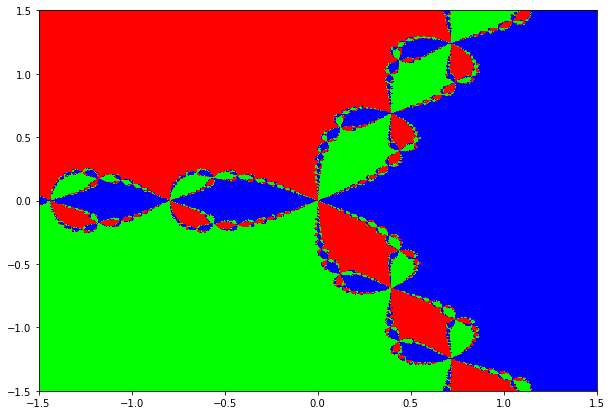

In [372]:
basis_newton(f, df, zeros, bounds, 500, 100)